## Load Pickles to Pandas Dataframes

In [2]:
import glob
pickles = glob.glob("*.pkl")
pickles

['LEVEL1_SENTINEL-2-L2A_2021-03-01.pkl',
 'LEVEL1_SENTINEL-2-L2A_2021-03-11.pkl',
 'LEVEL1_SENTINEL-2-L2A_2021-03-21.pkl',
 'LEVEL1_SENTINEL-2-L2A_2021-03-31.pkl']

In [3]:
import pandas as pd
dfs = [pd.read_pickle(pickle) for pickle in pickles]

In [4]:
march01 = dfs[0]
march11 = dfs[1]
march21 = dfs[2]
march31 = dfs[3]

## Exploratory

In [10]:
# different bands have different resolution "gsd"
# this is the reference dictionary key=resolution meter/pixel, and value=bands
gsd_bands = {
    10:['AOT','B02','B03','B04','B08','WVP','visual'],
    20:['B05','B06','B07','B11','B12','B8A','SCL'],
    60:['B01','B09']}

In [6]:
march01.head(1)

,Latitude and Longitude,Class of Land,latitude,longitude,geometry,grouping,AOT,B02,B03,B04,B08,WVP,visual,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5,B05,B06,B07,B11,B12,B8A,SCL,B05_w5,B06_w5,B07_w5,B11_w5,B12_w5,B8A_w5,SCL_w5,B01,B09,B01_w5,B09_w5
0,"(10.323727047081501, 105.2516346045924)",Rice,10.323727,105.251635,POINT (105.25163 10.32373),0,144.0,454.0,639.0,375.0,4956.0,4542.0,39.0,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[486.0, 484.0, 461.0, 453.0, 471.0], [473.0, ...","[[736.0, 740.0, 677.0, 650.0, 649.0], [695.0, ...","[[421.0, 401.0, 390.0, 379.0, 370.0], [401.0, ...","[[5272.0, 5204.0, 5080.0, 4776.0, 4724.0], [51...","[[4596.0, 4630.0, 4630.0, 4549.0, 4549.0], [45...","[[43.0, 41.0, 40.0, 39.0, 38.0], [41.0, 37.0, ...",867.0,3281.0,4990.0,1658.0,752.0,5401.0,4.0,"[[1037.0, 1052.0, 1003.0, 949.0, 912.0], [1005...","[[3597.0, 3717.0, 3628.0, 3379.0, 3305.0], [36...","[[5224.0, 5342.0, 5237.0, 4887.0, 4740.0], [52...","[[1651.0, 1708.0, 1671.0, 1589.0, 1550.0], [17...","[[763.0, 789.0, 775.0, 745.0, 713.0], [765.0, ...","[[5662.0, 5733.0, 5717.0, 5315.0, 5183.0], [56...","[[4.0, 4.0, 4.0, 4.0, 4.0], [4.0, 4.0, 4.0, 4....",488.0,5251.0,"[[591.0, 519.0, 495.0, 492.0, 475.0], [511.0, ...","[[5746.0, 5504.0, 5461.0, 5046.0, 3997.0], [55..."


In [7]:
march01.describe()

,latitude,longitude,grouping,AOT,B02,B03,B04,B08,WVP,visual,B05,B06,B07,B11,B12,B8A,SCL,B01,B09
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,10.221962,105.386662,2.083333,145.039993,1357.093384,1533.469971,1313.513306,3294.979980,4291.490234,99.353333,1852.574951,2918.129883,3415.283447,2064.841553,1368.863281,3631.763428,5.210000,1405.136719,4014.898438
std,0.204505,0.266264,1.936312,2.430689,1845.224365,1725.043213,1706.427979,1925.850098,332.404755,74.680099,1845.513916,1855.819824,1964.006226,1607.056030,1408.573120,2039.564819,1.822481,1870.422974,2808.666748
min,9.944900,104.911508,0.000000,144.000000,229.000000,267.000000,157.000000,191.000000,2700.000000,16.000000,293.000000,200.000000,213.000000,198.000000,160.000000,176.000000,2.000000,300.000000,339.000000
25%,10.005994,105.241642,0.750000,144.000000,461.000000,674.000000,418.750000,1579.500000,4227.750000,43.000000,923.000000,1395.000000,1666.750000,793.500000,524.250000,1808.000000,4.000000,503.000000,2071.000000
50%,10.321456,105.495555,1.500000,144.000000,655.000000,927.000000,676.500000,3424.000000,4374.000000,69.000000,1197.000000,2891.500000,3510.000000,1726.000000,880.000000,3859.500000,4.000000,687.000000,3819.000000
75%,10.358544,105.532825,3.250000,144.000000,1106.500000,1375.500000,1241.000000,4385.000000,4407.500000,126.250000,1773.000000,3563.000000,4404.000000,2436.000000,1357.000000,4818.750000,6.000000,1132.250000,4916.500000
max,10.482071,105.813516,6.000000,154.000000,11680.000000,11024.000000,10856.000000,10216.000000,5341.000000,255.000000,11732.000000,11141.000000,10772.000000,8583.000000,7274.000000,10676.000000,10.000000,12287.000000,15748.000000


Example of just viewing the bands with gsd = 10

<AxesSubplot: >

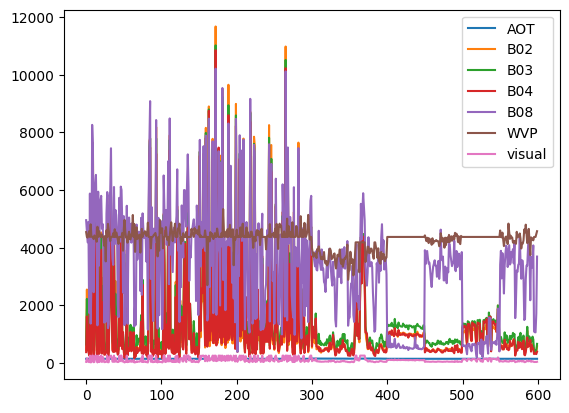

In [14]:
march01[gsd_bands[10]].plot()

The column name standard is such as AOT_w5

In [16]:
windowed_columns = [f"{band}_w5" for band in gsd_bands[10]]
windowed_columns

['AOT_w5', 'B02_w5', 'B03_w5', 'B04_w5', 'B08_w5', 'WVP_w5', 'visual_w5']

Example aggregating window5 values.

In [29]:
# original data
march01[windowed_columns].head(3)

,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5
0,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[486.0, 484.0, 461.0, 453.0, 471.0], [473.0, ...","[[736.0, 740.0, 677.0, 650.0, 649.0], [695.0, ...","[[421.0, 401.0, 390.0, 379.0, 370.0], [401.0, ...","[[5272.0, 5204.0, 5080.0, 4776.0, 4724.0], [51...","[[4596.0, 4630.0, 4630.0, 4549.0, 4549.0], [45...","[[43.0, 41.0, 40.0, 39.0, 38.0], [41.0, 37.0, ..."
1,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[3614.0, 3506.0, 2978.0, 2578.0, 2274.0], [34...","[[3518.0, 3262.0, 2934.0, 2700.0, 2222.0], [33...","[[3034.0, 2744.0, 2564.0, 2354.0, 1670.0], [26...","[[5724.0, 5516.0, 5140.0, 4840.0, 4396.0], [56...","[[4374.0, 4374.0, 4374.0, 4374.0, 4374.0], [43...","[[255.0, 255.0, 255.0, 240.0, 170.0], [255.0, ..."
2,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[516.0, 548.0, 543.0, 584.0, 607.0], [556.0, ...","[[697.0, 759.0, 735.0, 738.0, 750.0], [750.0, ...","[[420.0, 436.0, 462.0, 450.0, 478.0], [471.0, ...","[[4058.0, 4104.0, 4024.0, 4000.0, 4176.0], [40...","[[4458.0, 4432.0, 4432.0, 4511.0, 4511.0], [43...","[[43.0, 45.0, 47.0, 46.0, 49.0], [48.0, 49.0, ..."


In [31]:
# summation
march01[windowed_columns].applymap(lambda x:x.sum()).head(3)

,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5
0,3600.0,11499.0,16375.0,9170.0,123744.0,113771.0,943.0
1,3600.0,61506.0,58196.0,45815.0,113802.0,109350.0,4567.0
2,3600.0,13936.0,19288.0,12148.0,104442.0,110574.0,1245.0


In [32]:
# average
march01[windowed_columns].applymap(lambda x:x.mean()).head(3)

,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5
0,144.0,459.959991,655.000000,366.799988,4949.759766,4550.839844,37.720001
1,144.0,2460.239990,2327.840088,1832.599976,4552.080078,4374.000000,182.679993
2,144.0,557.440002,771.520020,485.920013,4177.680176,4422.959961,49.799999


In [33]:
# minimum
march01[windowed_columns].applymap(lambda x:x.min()).head(3)

,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5
0,144.0,436.0,605.0,324.0,4532.0,4367.0,33.0
1,144.0,1326.0,1332.0,908.0,3254.0,4374.0,93.0
2,144.0,493.0,697.0,420.0,3928.0,4336.0,43.0


In [34]:
# max
march01[windowed_columns].applymap(lambda x:x.max()).head(3)

,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5
0,144.0,486.0,740.0,421.0,5272.0,4630.0,43.0
1,144.0,3614.0,3518.0,3034.0,5724.0,4374.0,255.0
2,144.0,673.0,901.0,593.0,4648.0,4511.0,61.0


Merge mean data with original dataframe

In [37]:
march01_gsd10_w5mean = march01[windowed_columns].applymap(lambda x:x.mean())
march01 = march01.join(march01_gsd10_w5mean,rsuffix='_mean')
march01.head(3)

,Latitude and Longitude,Class of Land,latitude,longitude,geometry,grouping,AOT,B02,B03,B04,B08,WVP,visual,AOT_w5,B02_w5,B03_w5,B04_w5,B08_w5,WVP_w5,visual_w5,B05,B06,B07,B11,B12,B8A,SCL,B05_w5,B06_w5,B07_w5,B11_w5,B12_w5,B8A_w5,SCL_w5,B01,B09,B01_w5,B09_w5,AOT_w5_mean,B02_w5_mean,B03_w5_mean,B04_w5_mean,B08_w5_mean,WVP_w5_mean,visual_w5_mean
0,"(10.323727047081501, 105.2516346045924)",Rice,10.323727,105.251635,POINT (105.25163 10.32373),0,144.0,454.0,639.0,375.0,4956.0,4542.0,39.0,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[486.0, 484.0, 461.0, 453.0, 471.0], [473.0, ...","[[736.0, 740.0, 677.0, 650.0, 649.0], [695.0, ...","[[421.0, 401.0, 390.0, 379.0, 370.0], [401.0, ...","[[5272.0, 5204.0, 5080.0, 4776.0, 4724.0], [51...","[[4596.0, 4630.0, 4630.0, 4549.0, 4549.0], [45...","[[43.0, 41.0, 40.0, 39.0, 38.0], [41.0, 37.0, ...",867.0,3281.0,4990.0,1658.0,752.0,5401.0,4.0,"[[1037.0, 1052.0, 1003.0, 949.0, 912.0], [1005...","[[3597.0, 3717.0, 3628.0, 3379.0, 3305.0], [36...","[[5224.0, 5342.0, 5237.0, 4887.0, 4740.0], [52...","[[1651.0, 1708.0, 1671.0, 1589.0, 1550.0], [17...","[[763.0, 789.0, 775.0, 745.0, 713.0], [765.0, ...","[[5662.0, 5733.0, 5717.0, 5315.0, 5183.0], [56...","[[4.0, 4.0, 4.0, 4.0, 4.0], [4.0, 4.0, 4.0, 4....",488.0,5251.0,"[[591.0, 519.0, 495.0, 492.0, 475.0], [511.0, ...","[[5746.0, 5504.0, 5461.0, 5046.0, 3997.0], [55...",144.0,459.959991,655.000000,366.799988,4949.759766,4550.839844,37.720001
1,"(10.322364360592521, 105.27843410554115)",Rice,10.322364,105.278434,POINT (105.27843 10.32236),0,144.0,2548.0,2222.0,1614.0,4556.0,4374.0,164.0,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[3614.0, 3506.0, 2978.0, 2578.0, 2274.0], [34...","[[3518.0, 3262.0, 2934.0, 2700.0, 2222.0], [33...","[[3034.0, 2744.0, 2564.0, 2354.0, 1670.0], [26...","[[5724.0, 5516.0, 5140.0, 4840.0, 4396.0], [56...","[[4374.0, 4374.0, 4374.0, 4374.0, 4374.0], [43...","[[255.0, 255.0, 255.0, 240.0, 170.0], [255.0, ...",2833.0,4132.0,4516.0,3106.0,2280.0,4482.0,8.0,"[[4428.0, 4428.0, 4291.0, 3165.0, 2396.0], [38...","[[5506.0, 5506.0, 5332.0, 4352.0, 3632.0], [50...","[[6081.0, 6081.0, 5699.0, 4809.0, 4038.0], [55...","[[4454.0, 4454.0, 4212.0, 3415.0, 2729.0], [39...","[[3843.0, 3843.0, 3442.0, 2724.0, 2105.0], [32...","[[6138.0, 6138.0, 5832.0, 4890.0, 4071.0], [56...","[[9.0, 9.0, 9.0, 9.0, 8.0], [9.0, 9.0, 9.0, 8....",1380.0,3868.0,"[[2483.0, 3962.0, 2809.0, 1762.0, 2575.0], [25...","[[5300.0, 7245.0, 5989.0, 4134.0, 6061.0], [56...",144.0,2460.239990,2327.840088,1832.599976,4552.080078,4374.000000,182.679993
2,"(10.321455902933202, 105.25254306225168)",Rice,10.321456,105.252543,POINT (105.25254 10.32146),0,144.0,522.0,748.0,484.0,4188.0,4350.0,50.0,"[[144.0, 144.0, 144.0, 144.0, 144.0], [144.0, ...","[[516.0, 548.0, 543.0, 584.0, 607.0], [556.0, ...","[[697.0, 759.0, 735.0, 738.0, 750.0], [750.0, ...","[[420.0, 436.0, 462.0, 450.0, 478.0], [471.0, ...","[[4058.0, 4104.0, 4024.0, 4000.0, 4176.0], [40...","[[4458.0, 4432.0, 4432.0, 4511.0, 4511.0], [43...","[[43.0, 45.0, 47.0, 46.0, 49.0], [48.0, 49.0, ...",1069.0,3116.0,4124.0,1496.0,724.0,4435.0,4.0,"[[920.0, 918.0, 1013.0, 1060.0, 1001.0], [969....","[[3132.0, 3048.0, 2962.0, 3030.0, 3175.0], [30...","[[4493.0, 4274.0, 4015.0, 4013.0, 4254.0], [43...","[[1489.0, 1456.0, 1482.0, 1516.0, 1518.0], [14...","[[737.0, 736.0, 704.0, 703.0, 703.0], [710.0, ...","[[4868.0, 4642.0, 4267.0, 4342.0, 4691.0], [47...","[[4.0, 4.0, 4.0, 4.0, 4.0], [4.0, 4.0, 4.0, 4....",546.0,4685.0,"[[643.0, 573.0, 636.0, 665.0, 614.0], [521.0, ...","[[3438.0, 3254.0, 3672.0, 3278.0, 3016.0], [49...",144.0,557.440002,771.520020,485.920013,4177.680176,4422.959961,49.799999
